In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay
import scikitplot as skplt
from matplotlib.pyplot import figure
import scikitplot.estimators as esti


Reading all the files

In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd drive/MyDrive/ColabNotebooks/5gdata

/content/drive/MyDrive/ColabNotebooks/5gdata


In [6]:
dftrain=pd.read_parquet("./train.parquet")       
dftest=pd.read_parquet("./test.parquet")   
dfval=pd.read_parquet("./val.parquet")
dftrain_nooutlier=pd.read_parquet("./train_nooutlier.parquet")
dftrainmed=pd.read_csv("./trainmed.csv")
dftestmed=pd.read_csv("./testmed.csv")
dfvalmed=pd.read_csv("./valmed.csv")
dftrainmean=pd.read_csv("./trainmea.csv")
dftestmean=pd.read_csv("./testmean.csv")
dfvalmean=pd.read_csv("./valmean.csv")
dftrain1h=pd.read_csv("./train1h.csv")
dftrain_nooutlier1h=pd.read_csv("./train_nooutlier1h.csv")
dftest1h=pd.read_csv("./test1h.csv")
dfval1h=pd.read_csv("./val1h.csv")
dftrainindex=pd.read_parquet("./trainallusermergerdtime.parquet")
dfvalindex=pd.read_parquet("./valallusermergerdtime.parquet")

In [7]:
dftrainindex

,hour,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,id,type,key
specifictime,,,,,,,,,,,,
2021-06-10 18:14:59,18.0,23.0,455.250000,1.750000,23.835000,24.000000,26.000000,0.137250,0.251800,1,1,user1_UGE
2021-06-10 18:19:59,18.0,25.5,988.500000,5.000000,25.335000,3.500000,25.000000,0.050000,0.000000,1,1,user1_UGE
2021-06-10 18:24:59,18.0,26.4,4.333333,8.333333,30.133333,44.666667,38.666667,0.115567,0.069767,1,1,user1_UGE
2021-06-10 18:29:59,18.0,17.0,1.750000,1.250000,16.875000,0.750000,16.750000,0.000000,0.102950,1,1,user1_UGE
2021-06-10 18:34:59,18.0,25.0,2.000000,9.000000,37.500000,4.000000,52.000000,0.071400,0.142900,1,1,user1_UGE
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 23:39:59,23.0,0.0,0.000000,0.000000,0.000000,185.000000,24.000000,0.000000,0.000000,99,0,user99_UBE
2021-06-16 23:44:59,23.0,0.0,0.000000,0.000000,0.000000,233.000000,27.000000,0.000000,0.000000,99,0,user99_UBE
2021-06-16 23:49:59,23.0,0.0,0.000000,0.000000,0.000000,223.000000,30.000000,0.000000,0.000000,99,0,user99_UBE


In [8]:
dftrainindex['specifictime'] = dftrainindex.index
dfvalindex['specifictime'] = dfvalindex.index

Models


In [9]:
dftrainmed

,key,hour,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,type
0,user100_UBE,13.0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0,0.0
1,user100_UGE,13.0,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0,1.0
2,user101_UBE,15.0,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0,0.0
3,user101_UGE,14.0,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0,1.0
4,user102_UBE,14.0,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,user98_UGE,15.0,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0,1.0
296,user99_UBE,11.0,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0,0.0
297,user99_UGE,13.0,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0,1.0
298,user9_UBE,14.0,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0,0.0


In [10]:
dftestmean

,key,hour,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,type
0,user201_UBE,13.265162,25.345731,230.270630,80.930903,81.701298,128.678844,24.751313,0.019045,0.018539,0.0
1,user201_UGE,14.322520,54.707085,120.587049,136.074315,134.744167,72.375835,21.061401,0.019155,0.020119,1.0
2,user202_UBE,13.099180,37.735797,130.838073,58.779485,65.685586,81.460562,21.640277,0.019428,0.025522,0.0
3,user202_UGE,12.234105,89.690817,81.994151,42.552399,179.544373,78.846777,32.365259,0.010544,0.009643,1.0
4,user203_UBE,15.236731,25.365027,151.556583,276.740127,133.088155,66.971493,26.823928,0.026238,0.006841,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,user248_UGE,13.864031,99.029282,74.468416,77.459849,135.088286,22.892308,15.271225,0.022715,0.029461,1.0
96,user249_UBE,14.487153,66.696588,94.760761,276.352984,239.103677,46.316544,48.329663,0.016714,0.014945,0.0
97,user249_UGE,12.884896,68.200728,104.778289,7.631940,36.643243,43.733254,11.068179,0.005002,0.007563,1.0
98,user250_UBE,12.960323,1124.870897,49.092437,13.665150,153.660547,42.117901,16.217563,0.019541,0.021107,0.0


In [11]:
dftrainmed

,key,hour,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,type
0,user100_UBE,13.0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0,0.0
1,user100_UGE,13.0,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0,1.0
2,user101_UBE,15.0,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0,0.0
3,user101_UGE,14.0,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0,1.0
4,user102_UBE,14.0,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,user98_UGE,15.0,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0,1.0
296,user99_UBE,11.0,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0,0.0
297,user99_UGE,13.0,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0,1.0
298,user9_UBE,14.0,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0,0.0


In [12]:
dftrain.columns

Index(['day', 'hour', 'specifictime', 'indicator1', 'indicator2', 'indicator3',
       'indicator4', 'indicator5', 'indicator6', 'indicator7', 'indicator8',
       'id', 'type', 'key'],
      dtype='object')

Taking Aggregated on mean for individual user

> Indented block



In [56]:
X_train=dftrainmean[['indicator1', 'indicator2', 'indicator3','indicator4', 'indicator5', 'indicator6', 'indicator7', 'indicator8']]
X_test=dfvalmean[['indicator1', 'indicator2', 'indicator3','indicator4', 'indicator5', 'indicator6', 'indicator7', 'indicator8']]

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   indicator1  300 non-null    float64
 1   indicator2  300 non-null    float64
 2   indicator3  300 non-null    float64
 3   indicator4  300 non-null    float64
 4   indicator5  300 non-null    float64
 5   indicator6  300 non-null    float64
 6   indicator7  300 non-null    float64
 7   indicator8  300 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


In [58]:
# X_train1=X_train.loc[:,:'target_value'].copy().pct_change(1)
# X_train1

In [62]:
# X_test1=X_test.loc[:,:'target_value'].copy().pct_change(1)

In [63]:
# X_test1.fillna(method='bfill', inplace=True)
# X_train1.fillna(method='bfill', inplace=True)

In [64]:
y_train=dftrainmean["type"].astype(int)
y_test=dfvalmean["type"].astype(int)

In [65]:
# X_train1.replace([np.inf, -np.inf], np.nan)
# X_test1.replace([np.inf, -np.inf], np.nan)


In [66]:
scaler = StandardScaler()
Scalerfit=scaler.fit(X_train)

In [67]:
X_train=Scalerfit.transform(X_train)

In [68]:
#using scaler fitted on train data to scale the test dataIt is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
#This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.
X_test=Scalerfit.transform(X_test)

Logistic Regression : 0.57


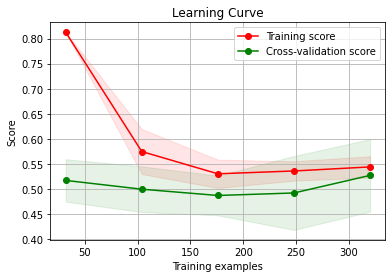

Decision Tree Classification : 0.47


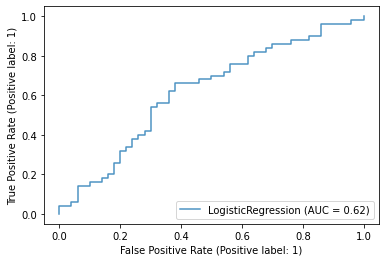

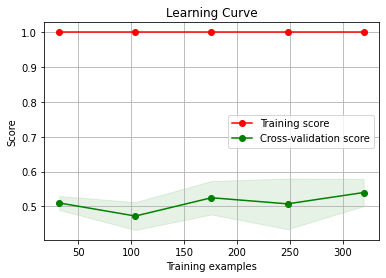

Random Forest Classification : 0.44


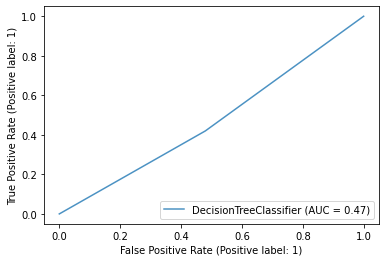

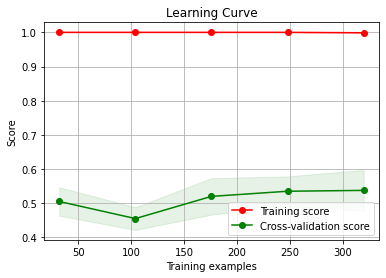

Gradient Boosting Classification : 0.57


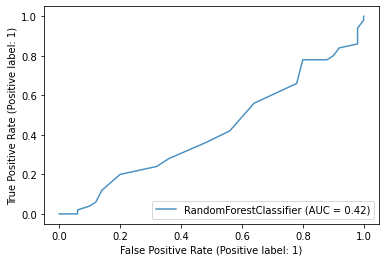

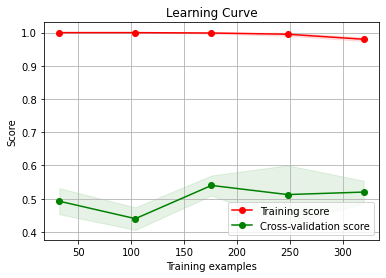

Ada Boosting Classification : 0.56


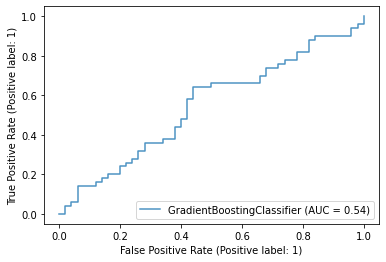

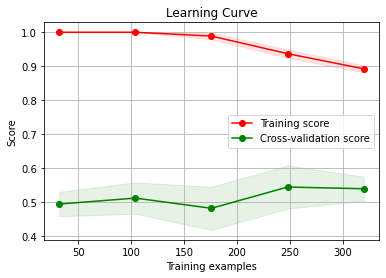

Extra Tree Classification : 0.45


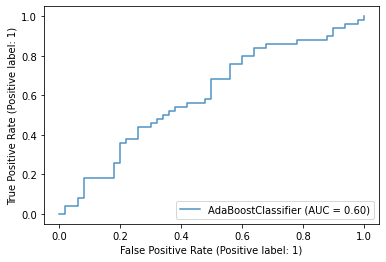

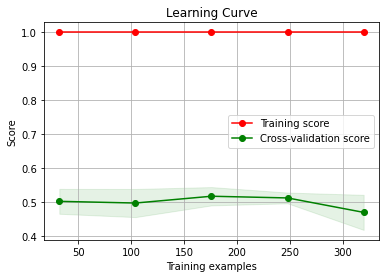

K-Neighbors Classification : 0.46


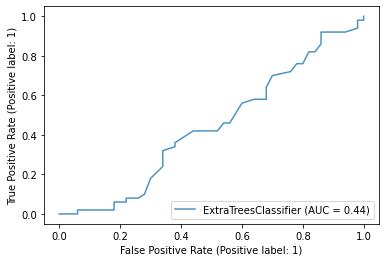

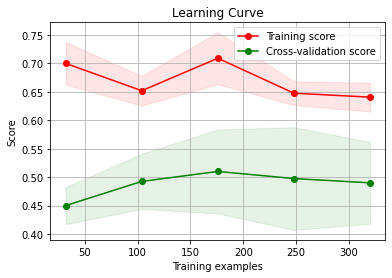

Support Vector Classification : 0.51


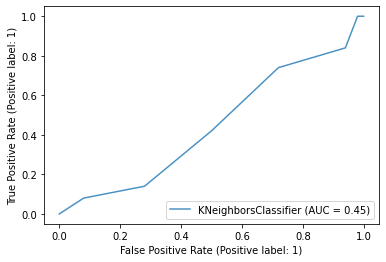

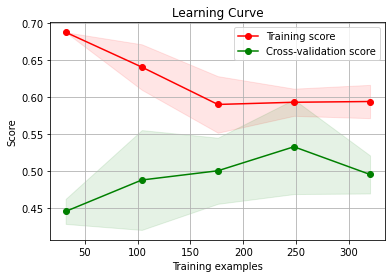

Gausian Naive Bayes : 0.56


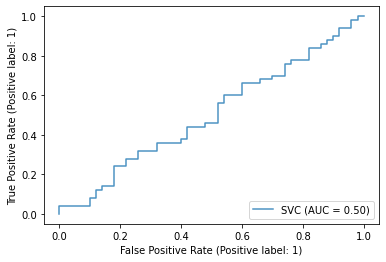

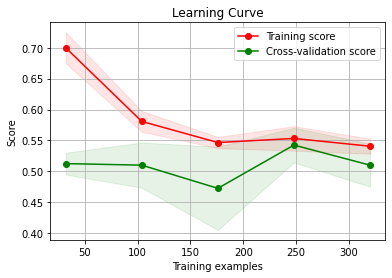

[16:58:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost Classification : 0.51
[16:58:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } migh

[16:58:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could b

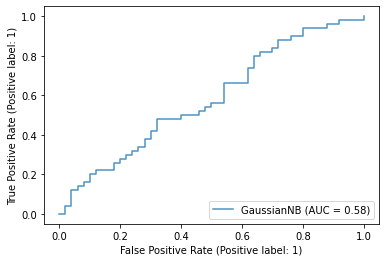

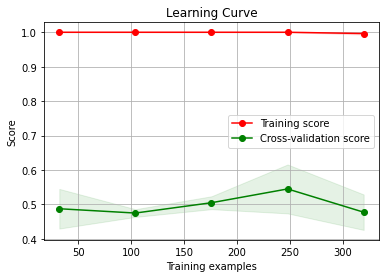

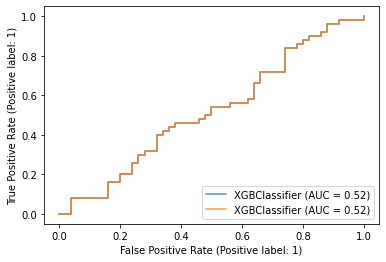

In [69]:
classifiers=[['Logistic Regression :',LogisticRegression()], 
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier(n_estimators=100)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier(n_neighbors=7)],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()],

       ['XGBoost Classification :', xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=20, al_metric=["auc", "error"])],
      ]
cla_pred=[]
max_accuracy = float('-inf')
for index, (name,model) in enumerate(classifiers):
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    accuracy_ = accuracy_score(y_test,predictions)
    if accuracy_ > max_accuracy:
        max_index = index
    print(name, accuracy_)

    esti.plot_learning_curve(model, X, y)
    plt.show()
    


    ax = plt.gca()
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
disp.plot(ax=ax, alpha=0.8)

# DNN

In [71]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow
import keras.models
from keras.layers import Activation, Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [72]:
classifier = keras.models.Sequential()
classifier.add(Dense(units=5, input_dim=8, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
#dropout l2 regularisation

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=300 , epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 1s 648ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5233
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5333
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 10/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 5ms/step - loss: 0.6775 - binary_accuracy: 0.5567
Epoch 155/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6773 - binary_accuracy: 0.5567
Epoch 156/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6771 - binary_accuracy: 0.5567
Epoch 157/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6770 - binary_accuracy: 0.5567
Epoch 158/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6768 - binary_accuracy: 0.5533
Epoch 159/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6766 - binary_accuracy: 0.5533
Epoch 160/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6765 - binary_accuracy: 0.5567
Epoch 161/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6763 - binary_accuracy: 0.5600
Epoch 162/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6761 - binary_accuracy: 0.5600
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.6521 - binary_accuracy: 0.6300
Epoch 307/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6520 - binary_accuracy: 0.6300
Epoch 308/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6518 - binary_accuracy: 0.6300
Epoch 309/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6517 - binary_accuracy: 0.6300
Epoch 310/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6516 - binary_accuracy: 0.6300
Epoch 311/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6515 - binary_accuracy: 0.6300
Epoch 312/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6513 - binary_accuracy: 0.6300
Epoch 313/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6512 - binary_accuracy: 0.6300
Epoch 314/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6511 - binary_accuracy: 0.6267
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.6346 - binary_accuracy: 0.6333
Epoch 459/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6345 - binary_accuracy: 0.6367
Epoch 460/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6344 - binary_accuracy: 0.6333
Epoch 461/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6342 - binary_accuracy: 0.6333
Epoch 462/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6341 - binary_accuracy: 0.6367
Epoch 463/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6339 - binary_accuracy: 0.6367
Epoch 464/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6338 - binary_accuracy: 0.6333
Epoch 465/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6336 - binary_accuracy: 0.6333
Epoch 466/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6335 - binary_accuracy: 0.6300
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.6032 - binary_accuracy: 0.6500
Epoch 611/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6031 - binary_accuracy: 0.6500
Epoch 612/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6030 - binary_accuracy: 0.6500
Epoch 613/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6029 - binary_accuracy: 0.6500
Epoch 614/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6028 - binary_accuracy: 0.6500
Epoch 615/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6027 - binary_accuracy: 0.6500
Epoch 616/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6025 - binary_accuracy: 0.6500
Epoch 617/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6024 - binary_accuracy: 0.6500
Epoch 618/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6023 - binary_accuracy: 0.6500
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 0.5935 - binary_accuracy: 0.6533
Epoch 763/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5934 - binary_accuracy: 0.6533
Epoch 764/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5934 - binary_accuracy: 0.6533
Epoch 765/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5933 - binary_accuracy: 0.6533
Epoch 766/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5933 - binary_accuracy: 0.6533
Epoch 767/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5932 - binary_accuracy: 0.6533
Epoch 768/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5932 - binary_accuracy: 0.6533
Epoch 769/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5931 - binary_accuracy: 0.6533
Epoch 770/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5931 - binary_accuracy: 0.6533
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.5881 - binary_accuracy: 0.6667
Epoch 915/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5880 - binary_accuracy: 0.6700
Epoch 916/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5880 - binary_accuracy: 0.6700
Epoch 917/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5880 - binary_accuracy: 0.6700
Epoch 918/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5879 - binary_accuracy: 0.6700
Epoch 919/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5879 - binary_accuracy: 0.6700
Epoch 920/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5879 - binary_accuracy: 0.6700
Epoch 921/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5878 - binary_accuracy: 0.6700
Epoch 922/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5878 - binary_accuracy: 0.6700
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.5830 - binary_accuracy: 0.6700
Epoch 1067/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5830 - binary_accuracy: 0.6700
Epoch 1068/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5830 - binary_accuracy: 0.6700
Epoch 1069/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5829 - binary_accuracy: 0.6700
Epoch 1070/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5829 - binary_accuracy: 0.6700
Epoch 1071/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5829 - binary_accuracy: 0.6700
Epoch 1072/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5829 - binary_accuracy: 0.6733
Epoch 1073/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5828 - binary_accuracy: 0.6733
Epoch 1074/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5828 - binary_accuracy: 0.6733
Epoch 1075/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5805 - binary_accuracy: 0.6767
Epoch 1143/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5805 - binary_accuracy: 0.6767
Epoch 1144/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5805 - binary_accuracy: 0.6767
Epoch 1145/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5805 - binary_accuracy: 0.6767
Epoch 1146/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5804 - binary_accuracy: 0.6767
Epoch 1147/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5804 - binary_accuracy: 0.6767
Epoch 1148/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5804 - binary_accuracy: 0.6767
Epoch 1149/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5804 - binary_accuracy: 0.6767
Epoch 1150/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5803 - binary_accuracy: 0.6767
Epoch 1151/2000
1/1 [=======================

Epoch 1218/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5792 - binary_accuracy: 0.6800
Epoch 1219/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5792 - binary_accuracy: 0.6800
Epoch 1220/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5792 - binary_accuracy: 0.6800
Epoch 1221/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5792 - binary_accuracy: 0.6800
Epoch 1222/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5792 - binary_accuracy: 0.6800
Epoch 1223/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5791 - binary_accuracy: 0.6800
Epoch 1224/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5791 - binary_accuracy: 0.6800
Epoch 1225/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5791 - binary_accuracy: 0.6800
Epoch 1226/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5791 - binary_accuracy: 0.6800
Epoch 1227/2000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.5748 - binary_accuracy: 0.6767
Epoch 1370/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5748 - binary_accuracy: 0.6767
Epoch 1371/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1372/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1373/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1374/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1375/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1376/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1377/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5747 - binary_accuracy: 0.6767
Epoch 1378/2000
1/1 [=======================

Epoch 1445/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5726 - binary_accuracy: 0.6967
Epoch 1446/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5725 - binary_accuracy: 0.6967
Epoch 1447/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5724 - binary_accuracy: 0.6967
Epoch 1448/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5724 - binary_accuracy: 0.6967
Epoch 1449/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5723 - binary_accuracy: 0.6967
Epoch 1450/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5722 - binary_accuracy: 0.6967
Epoch 1451/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5722 - binary_accuracy: 0.6967
Epoch 1452/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5721 - binary_accuracy: 0.6933
Epoch 1453/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5721 - binary_accuracy: 0.6933
Epoch 1454/2000
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.5676 - binary_accuracy: 0.6833
Epoch 1597/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5675 - binary_accuracy: 0.6833
Epoch 1598/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5675 - binary_accuracy: 0.6833
Epoch 1599/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5674 - binary_accuracy: 0.6833
Epoch 1600/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5673 - binary_accuracy: 0.6833
Epoch 1601/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5673 - binary_accuracy: 0.6867
Epoch 1602/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5672 - binary_accuracy: 0.6867
Epoch 1603/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5671 - binary_accuracy: 0.6867
Epoch 1604/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5670 - binary_accuracy: 0.6867
Epoch 1605/2000
1/1 [=======================

Epoch 1672/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5649 - binary_accuracy: 0.6933
Epoch 1673/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1674/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1675/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5648 - binary_accuracy: 0.6967
Epoch 1676/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1677/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1678/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1679/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5648 - binary_accuracy: 0.6933
Epoch 1680/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5647 - binary_accuracy: 0.6967
Epoch 1681/2000
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.5606 - binary_accuracy: 0.7067
Epoch 1824/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5606 - binary_accuracy: 0.7067
Epoch 1825/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5606 - binary_accuracy: 0.7067
Epoch 1826/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1827/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1828/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1829/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1830/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1831/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5605 - binary_accuracy: 0.7067
Epoch 1832/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1900/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1901/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1902/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1903/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1904/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5597 - binary_accuracy: 0.7133
Epoch 1905/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5596 - binary_accuracy: 0.7133
Epoch 1906/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5596 - binary_accuracy: 0.7133
Epoch 1907/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5596 - binary_accuracy: 0.7133
Epoch 1908/2000
1/1 [=======================

Epoch 1975/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1976/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1977/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1978/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1979/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1980/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1981/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5589 - binary_accuracy: 0.7133
Epoch 1982/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5588 - binary_accuracy: 0.7133
Epoch 1983/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5588 - binary_accuracy: 0.7167
Epoch 1984/2000
1/1 [=======

In [73]:
classifier.evaluate(X_train, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 0.5586 - binary_accuracy: 0.7167


[0.5586427450180054, 0.7166666388511658]

In [74]:
classifier.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.8796 - binary_accuracy: 0.5500


[0.8795880079269409, 0.550000011920929]

Taking median to aggregate

In [75]:
X_train=dftrainmed[['indicator1', 'indicator2', 'indicator3','indicator4', 'indicator5', 'indicator6', 'indicator7', 'indicator8']]
X_test=dfvalmed[['indicator1', 'indicator2', 'indicator3','indicator4', 'indicator5', 'indicator6', 'indicator7', 'indicator8']]

In [76]:
X_train

,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8
0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0
1,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0
2,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0
3,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0
4,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0
...,...,...,...,...,...,...,...,...
295,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0
296,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0
297,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0
298,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0


In [77]:
X_test

,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8
0,14.50,4.20,2.88,16.60,7.0,17.0,0.0,0.0
1,12.50,40.00,4.17,13.00,42.0,15.0,0.0,0.0
2,12.50,16.00,1.31,13.80,28.0,16.0,0.0,0.0
3,18.67,4.25,2.00,12.33,7.0,15.0,0.0,0.0
4,12.40,40.00,4.50,13.00,42.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,11.00,4.00,3.00,11.00,8.0,15.0,0.0,0.0
96,11.57,37.50,2.33,12.00,40.0,15.0,0.0,0.0
97,8.17,33.00,1.50,9.00,30.0,11.0,0.0,0.0
98,13.75,30.00,2.00,14.00,33.0,14.0,0.0,0.0


In [78]:
y_train=dftrainmed["type"].astype(int)
y_test=dfvalmed["type"].astype(int)

In [79]:
scaler = StandardScaler()
Scalerfit=scaler.fit(X_train)

In [80]:
X_train=Scalerfit.transform(X_train)

In [81]:
#using minmax fitted on train data to scale the test dataIt is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
#This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.
X_test=Scalerfit.transform(X_test)

Logistic Regression : 0.44


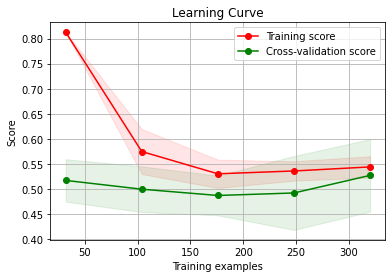

Decision Tree Classification : 0.46


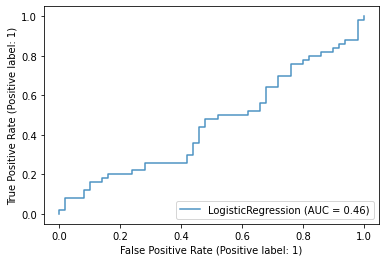

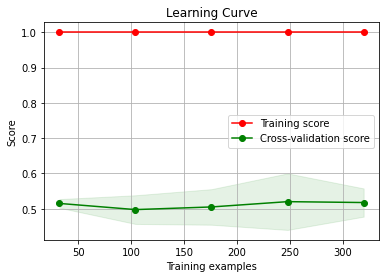

Random Forest Classification : 0.51


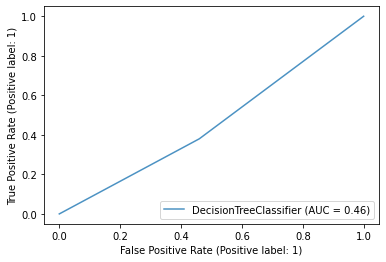

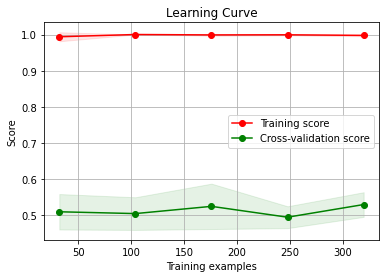

Gradient Boosting Classification : 0.5


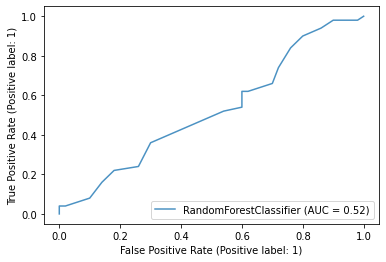

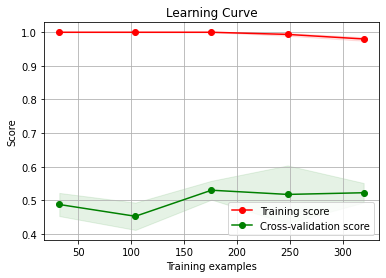

Ada Boosting Classification : 0.45


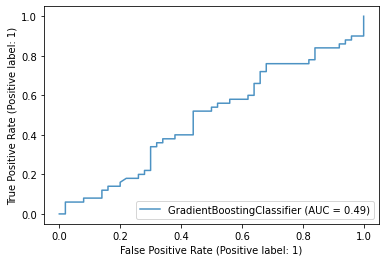

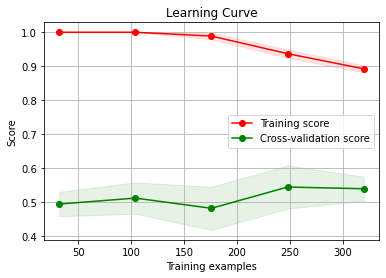

Extra Tree Classification : 0.54


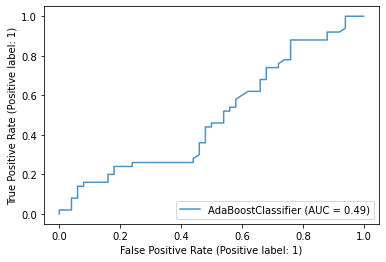

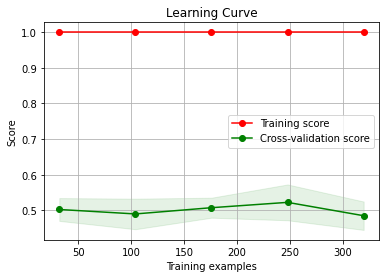

K-Neighbors Classification : 0.49


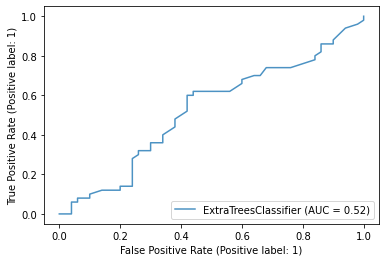

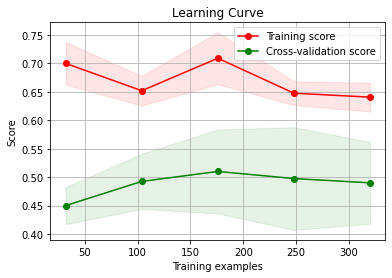

Support Vector Classification : 0.47


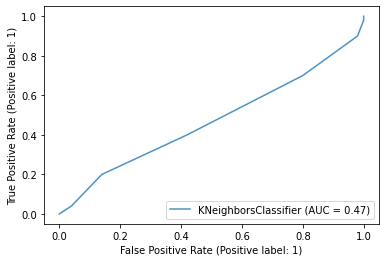

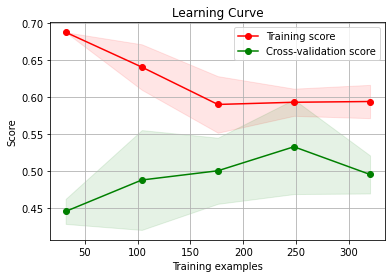

Gausian Naive Bayes : 0.52


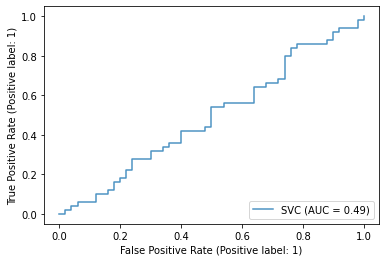

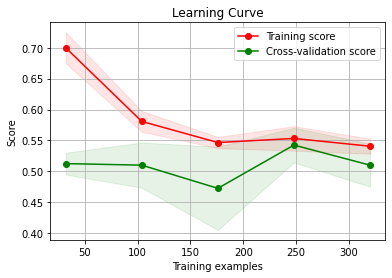

[17:02:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost Classification : 0.5
[17:02:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might

[17:02:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:02:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "al_metric" } might not be used.

  This could b

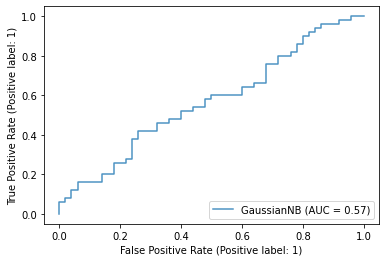

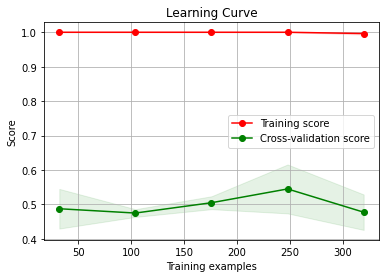

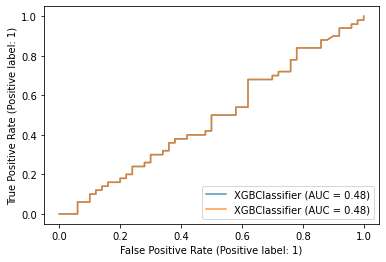

In [82]:
classifiers=[['Logistic Regression :',LogisticRegression()], 
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier(n_estimators=100)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier(n_neighbors=7)],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()],

       ['XGBoost Classification :', xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=20, al_metric=["auc", "error"])],
      ]
cla_pred=[]
max_accuracy = float('-inf')
for index, (name,model) in enumerate(classifiers):
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    accuracy_ = accuracy_score(y_test,predictions)
    if accuracy_ > max_accuracy:
        max_index = index
    print(name, accuracy_)

    esti.plot_learning_curve(model, X, y)
    plt.show()
    


    ax = plt.gca()
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
disp.plot(ax=ax, alpha=0.8)

In [83]:
classifier = keras.models.Sequential()
classifier.add(Dense(units=5, input_dim=8, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
#dropout l2 regularisation

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=300 , epochs=2000, verbose=1)

Epoch 1/2000
1/1 [==============================] - 1s 606ms/step - loss: 0.6931 - binary_accuracy: 0.5167
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.4967
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5033
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5133
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5567
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5033
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 10/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 4ms/step - loss: 0.6810 - binary_accuracy: 0.5733
Epoch 155/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6808 - binary_accuracy: 0.5767
Epoch 156/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6806 - binary_accuracy: 0.5767
Epoch 157/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6804 - binary_accuracy: 0.5733
Epoch 158/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6802 - binary_accuracy: 0.5767
Epoch 159/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6800 - binary_accuracy: 0.5733
Epoch 160/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6798 - binary_accuracy: 0.5700
Epoch 161/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6796 - binary_accuracy: 0.5700
Epoch 162/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6794 - binary_accuracy: 0.5700
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 0.6559 - binary_accuracy: 0.6167
Epoch 307/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6558 - binary_accuracy: 0.6133
Epoch 308/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6557 - binary_accuracy: 0.6133
Epoch 309/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6555 - binary_accuracy: 0.6133
Epoch 310/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6554 - binary_accuracy: 0.6133
Epoch 311/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6553 - binary_accuracy: 0.6100
Epoch 312/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6552 - binary_accuracy: 0.6100
Epoch 313/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6550 - binary_accuracy: 0.6133
Epoch 314/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6549 - binary_accuracy: 0.6167
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.6387 - binary_accuracy: 0.6533
Epoch 459/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6386 - binary_accuracy: 0.6567
Epoch 460/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6385 - binary_accuracy: 0.6567
Epoch 461/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6384 - binary_accuracy: 0.6600
Epoch 462/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6383 - binary_accuracy: 0.6567
Epoch 463/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6383 - binary_accuracy: 0.6533
Epoch 464/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6382 - binary_accuracy: 0.6533
Epoch 465/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6381 - binary_accuracy: 0.6500
Epoch 466/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6381 - binary_accuracy: 0.6500
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.6271 - binary_accuracy: 0.6700
Epoch 611/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6271 - binary_accuracy: 0.6700
Epoch 612/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6270 - binary_accuracy: 0.6700
Epoch 613/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6269 - binary_accuracy: 0.6700
Epoch 614/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6268 - binary_accuracy: 0.6700
Epoch 615/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6268 - binary_accuracy: 0.6700
Epoch 616/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6267 - binary_accuracy: 0.6700
Epoch 617/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6266 - binary_accuracy: 0.6700
Epoch 618/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6266 - binary_accuracy: 0.6700
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.6174 - binary_accuracy: 0.6633
Epoch 763/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6173 - binary_accuracy: 0.6633
Epoch 764/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6173 - binary_accuracy: 0.6633
Epoch 765/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6172 - binary_accuracy: 0.6633
Epoch 766/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6172 - binary_accuracy: 0.6633
Epoch 767/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6171 - binary_accuracy: 0.6600
Epoch 768/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6170 - binary_accuracy: 0.6600
Epoch 769/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6169 - binary_accuracy: 0.6600
Epoch 770/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6169 - binary_accuracy: 0.6600
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.6085 - binary_accuracy: 0.6767
Epoch 915/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6084 - binary_accuracy: 0.6767
Epoch 916/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6084 - binary_accuracy: 0.6767
Epoch 917/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6083 - binary_accuracy: 0.6767
Epoch 918/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6083 - binary_accuracy: 0.6800
Epoch 919/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6083 - binary_accuracy: 0.6800
Epoch 920/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6082 - binary_accuracy: 0.6800
Epoch 921/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6082 - binary_accuracy: 0.6767
Epoch 922/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6081 - binary_accuracy: 0.6767
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.6025 - binary_accuracy: 0.6867
Epoch 1067/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6024 - binary_accuracy: 0.6867
Epoch 1068/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6024 - binary_accuracy: 0.6867
Epoch 1069/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6024 - binary_accuracy: 0.6900
Epoch 1070/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6024 - binary_accuracy: 0.6900
Epoch 1071/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6023 - binary_accuracy: 0.6867
Epoch 1072/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6023 - binary_accuracy: 0.6867
Epoch 1073/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6022 - binary_accuracy: 0.6867
Epoch 1074/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6022 - binary_accuracy: 0.6867
Epoch 1075/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.6003 - binary_accuracy: 0.6933
Epoch 1143/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6002 - binary_accuracy: 0.6900
Epoch 1144/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6002 - binary_accuracy: 0.6900
Epoch 1145/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6002 - binary_accuracy: 0.6900
Epoch 1146/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6001 - binary_accuracy: 0.6900
Epoch 1147/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6001 - binary_accuracy: 0.6933
Epoch 1148/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6001 - binary_accuracy: 0.6900
Epoch 1149/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6000 - binary_accuracy: 0.6900
Epoch 1150/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6000 - binary_accuracy: 0.6900
Epoch 1151/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5980 - binary_accuracy: 0.6900
Epoch 1219/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5979 - binary_accuracy: 0.6900
Epoch 1220/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5979 - binary_accuracy: 0.6900
Epoch 1221/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5979 - binary_accuracy: 0.6933
Epoch 1222/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5979 - binary_accuracy: 0.6933
Epoch 1223/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5978 - binary_accuracy: 0.6900
Epoch 1224/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5978 - binary_accuracy: 0.6933
Epoch 1225/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5978 - binary_accuracy: 0.6933
Epoch 1226/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5978 - binary_accuracy: 0.6933
Epoch 1227/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5956 - binary_accuracy: 0.6967
Epoch 1295/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5955 - binary_accuracy: 0.6967
Epoch 1296/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5955 - binary_accuracy: 0.6967
Epoch 1297/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5955 - binary_accuracy: 0.6967
Epoch 1298/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5955 - binary_accuracy: 0.6967
Epoch 1299/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5954 - binary_accuracy: 0.6967
Epoch 1300/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5954 - binary_accuracy: 0.6967
Epoch 1301/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5954 - binary_accuracy: 0.6967
Epoch 1302/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5953 - binary_accuracy: 0.6967
Epoch 1303/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5926 - binary_accuracy: 0.7000
Epoch 1371/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5925 - binary_accuracy: 0.7000
Epoch 1372/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5924 - binary_accuracy: 0.7000
Epoch 1373/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5923 - binary_accuracy: 0.6967
Epoch 1374/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5923 - binary_accuracy: 0.6967
Epoch 1375/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5922 - binary_accuracy: 0.6967
Epoch 1376/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5921 - binary_accuracy: 0.6967
Epoch 1377/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5920 - binary_accuracy: 0.6967
Epoch 1378/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5919 - binary_accuracy: 0.6967
Epoch 1379/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5872 - binary_accuracy: 0.7133
Epoch 1447/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5872 - binary_accuracy: 0.7133
Epoch 1448/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5871 - binary_accuracy: 0.7133
Epoch 1449/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5871 - binary_accuracy: 0.7133
Epoch 1450/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5871 - binary_accuracy: 0.7133
Epoch 1451/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5870 - binary_accuracy: 0.7167
Epoch 1452/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5870 - binary_accuracy: 0.7133
Epoch 1453/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5869 - binary_accuracy: 0.7100
Epoch 1454/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5869 - binary_accuracy: 0.7133
Epoch 1455/2000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.5845 - binary_accuracy: 0.7133
Epoch 1523/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5845 - binary_accuracy: 0.7133
Epoch 1524/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5845 - binary_accuracy: 0.7133
Epoch 1525/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5844 - binary_accuracy: 0.7133
Epoch 1526/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5844 - binary_accuracy: 0.7133
Epoch 1527/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5844 - binary_accuracy: 0.7100
Epoch 1528/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5844 - binary_accuracy: 0.7100
Epoch 1529/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5843 - binary_accuracy: 0.7133
Epoch 1530/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5843 - binary_accuracy: 0.7167
Epoch 1531/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5812 - binary_accuracy: 0.7100
Epoch 1599/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5812 - binary_accuracy: 0.7100
Epoch 1600/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5812 - binary_accuracy: 0.7067
Epoch 1601/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5811 - binary_accuracy: 0.7067
Epoch 1602/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5811 - binary_accuracy: 0.7067
Epoch 1603/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5811 - binary_accuracy: 0.7100
Epoch 1604/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5810 - binary_accuracy: 0.7100
Epoch 1605/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5810 - binary_accuracy: 0.7100
Epoch 1606/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5810 - binary_accuracy: 0.7100
Epoch 1607/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5791 - binary_accuracy: 0.7100
Epoch 1675/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5791 - binary_accuracy: 0.7100
Epoch 1676/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5791 - binary_accuracy: 0.7100
Epoch 1677/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5791 - binary_accuracy: 0.7100
Epoch 1678/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5790 - binary_accuracy: 0.7100
Epoch 1679/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5790 - binary_accuracy: 0.7100
Epoch 1680/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5790 - binary_accuracy: 0.7100
Epoch 1681/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5790 - binary_accuracy: 0.7100
Epoch 1682/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5790 - binary_accuracy: 0.7067
Epoch 1683/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5777 - binary_accuracy: 0.7133
Epoch 1751/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5777 - binary_accuracy: 0.7133
Epoch 1752/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5777 - binary_accuracy: 0.7133
Epoch 1753/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5777 - binary_accuracy: 0.7133
Epoch 1754/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5776 - binary_accuracy: 0.7133
Epoch 1755/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5776 - binary_accuracy: 0.7133
Epoch 1756/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5776 - binary_accuracy: 0.7133
Epoch 1757/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5775 - binary_accuracy: 0.7133
Epoch 1758/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5775 - binary_accuracy: 0.7133
Epoch 1759/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5766 - binary_accuracy: 0.7133
Epoch 1827/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5766 - binary_accuracy: 0.7100
Epoch 1828/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - binary_accuracy: 0.7100
Epoch 1829/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5765 - binary_accuracy: 0.7100
Epoch 1830/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - binary_accuracy: 0.7100
Epoch 1831/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - binary_accuracy: 0.7133
Epoch 1832/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - binary_accuracy: 0.7133
Epoch 1833/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5765 - binary_accuracy: 0.7133
Epoch 1834/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - binary_accuracy: 0.7133
Epoch 1835/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.5758 - binary_accuracy: 0.7067
Epoch 1903/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5758 - binary_accuracy: 0.7067
Epoch 1904/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5758 - binary_accuracy: 0.7067
Epoch 1905/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5758 - binary_accuracy: 0.7100
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5758 - binary_accuracy: 0.7100
Epoch 1907/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5758 - binary_accuracy: 0.7100
Epoch 1908/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5758 - binary_accuracy: 0.7100
Epoch 1909/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5757 - binary_accuracy: 0.7100
Epoch 1910/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5757 - binary_accuracy: 0.7100
Epoch 1911/2000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1979/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1980/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1981/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5750 - binary_accuracy: 0.7133
Epoch 1982/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5750 - binary_accuracy: 0.7133
Epoch 1983/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1984/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1985/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1986/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5750 - binary_accuracy: 0.7100
Epoch 1987/2000
1/1 [=======================

In [84]:
classifier.evaluate(X_train, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 0.5748 - binary_accuracy: 0.7100


[0.5748205780982971, 0.7099999785423279]

In [85]:
classifier.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.9280 - binary_accuracy: 0.4600


[0.9280104041099548, 0.46000000834465027]

Tryin XGBoost on mean